# Kütüphaneleri Yükle

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from load_and_save_files import load_mnist, load_alphabet, load_pickle

# MNIST veri setine Göz Atalım

In [2]:
train_x_mnist, train_y_mnist, test_x_mnist, test_y_mnist = load_mnist()

print('Shape of training data: ', train_x_mnist.shape)
print('Shape of training labels: ', train_y_mnist.shape)
print('Shape of testing data: ', test_x_mnist.shape)
print('Shape of testing labels: ', test_y_mnist.shape)

train_x_mnist, train_y_mnist, test_x_mnist, test_y_mnist = [pd.DataFrame(x) for x in [train_x_mnist, train_y_mnist, test_x_mnist, test_y_mnist]]

# suffle
train_x_mnist, train_y_mnist = train_x_mnist.sample(frac=1, random_state=42), train_y_mnist.sample(frac=1, random_state=42)
test_x_mnist, test_y_mnist = test_x_mnist.sample(frac=1, random_state=42), test_y_mnist.sample(frac=1, random_state=42)

Shape of training data:  (60000, 784)
Shape of training labels:  (60000,)
Shape of testing data:  (10000, 784)
Shape of testing labels:  (10000,)


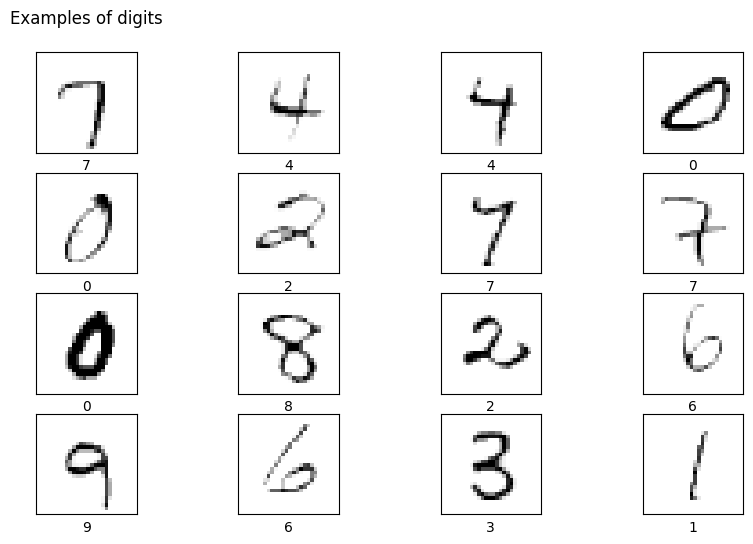

In [3]:
# show the first 16 images with matplotlib and write the labels on the plot
fig, ax = plt.subplots(4, 4, figsize=(10, 6))

for i, axi in enumerate(ax.flat):
    axi.imshow(train_x_mnist.iloc[i].values.reshape(28, 28), cmap='binary')
    axi.set(xticks=[], yticks=[], xlabel=train_y_mnist.iloc[i].values[0])
ax[0, 0].set(title='Examples of digits\n');
plt.show()

# Alphabet Veri Setine Göz Atalım

In [4]:
train_x_alphabet, train_y_alphabet, valid_x_alphabet, valid_y_alphabet, test_x_alphabet, test_y_alphabet = load_alphabet()
# add validation to the end of training set
train_x_alphabet = np.concatenate((train_x_alphabet, valid_x_alphabet))
train_y_alphabet = np.concatenate((train_y_alphabet, valid_y_alphabet))

print('Shape of training data: ', train_x_alphabet.shape)
print('Shape of training labels: ', train_y_alphabet.shape)
print('Shape of testing data: ', test_x_alphabet.shape)
print('Shape of testing labels: ', test_y_alphabet.shape)

# Convert to pandas dataframe
train_x_alphabet, train_y_alphabet, test_x_alphabet, test_y_alphabet = [pd.DataFrame(x) for x in [train_x_alphabet, train_y_alphabet, test_x_alphabet, test_y_alphabet]]

# suffle
train_x_alphabet, train_y_alphabet = train_x_alphabet.sample(frac=1, random_state=42), train_y_alphabet.sample(frac=1, random_state=42)
test_x_alphabet, test_y_alphabet = test_x_alphabet.sample(frac=1, random_state=42), test_y_alphabet.sample(frac=1, random_state=42)

Shape of training data:  (14704, 784)
Shape of training labels:  (14704,)
Shape of testing data:  (1792, 784)
Shape of testing labels:  (1792,)


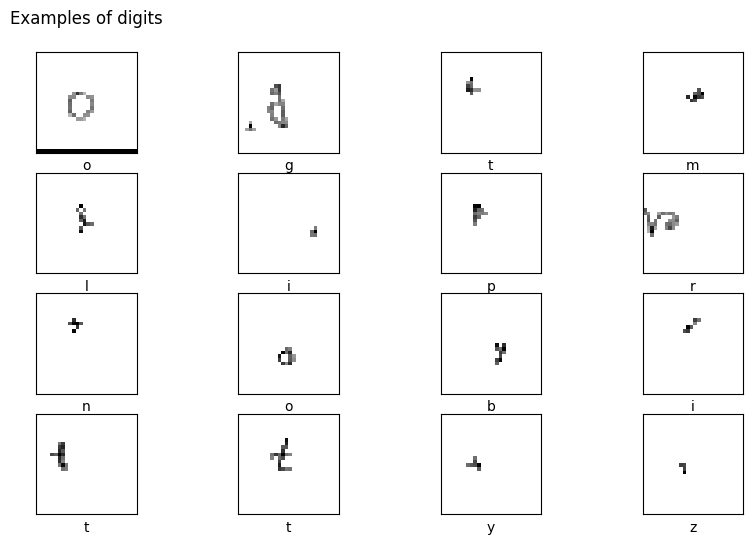

In [21]:
# show the first 16 images with matplotlib and write the labels on the plot
fig, ax = plt.subplots(4, 4, figsize=(10, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(train_x_alphabet.iloc[i].values.reshape(28, 28), cmap='binary')
    letter = chr(train_y_alphabet.iloc[i].values[0])
    axi.set(xticks=[], yticks=[], xlabel=letter)
ax[0, 0].set(title='Examples of digits\n');
plt.show()

# Önişlemesi Yapılmış Veri Setlerini Yükle

In [6]:
data = load_pickle("data/preprocessed_data.pkl")

train_x, train_y, test_x, test_y = data["train_x"], data["train_y"], data["test_x"], data["test_y"]

print('Shape of training data: ', train_x.shape)
print('Shape of training labels: ', train_y.shape)
print('Shape of testing data: ', test_x.shape)
print('Shape of testing labels: ', test_y.shape)

Shape of training data:  (20704, 784)
Shape of training labels:  (20704, 1)
Shape of testing data:  (2542, 784)
Shape of testing labels:  (2542, 1)


# Confusion Matrix Çizimi için Fonksiyon

In [7]:
def confusion_matrix_plot(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    # cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(15, 15))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', square=True)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    plt.show()

# Yapay Sinir Ağı Modeli Testi

In [8]:
mlp_model = pickle.load(open('model/multi_layer_perceptron.pkl', 'rb'))
y_pred = mlp_model.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        69
           1       0.92      0.95      0.93        94
           2       0.90      0.83      0.86        92
           3       0.86      0.83      0.84        87
           4       0.90      0.88      0.89        68
           5       0.74      0.78      0.76        54
           6       0.95      0.92      0.94        65
           7       0.86      0.94      0.90        65
           8       0.81      0.78      0.79        72
           9       0.89      0.83      0.86        84
          97       0.47      0.50      0.48        68
          98       0.73      0.65      0.69        72
          99       0.49      0.64      0.55        67
         100       0.62      0.70      0.66        57
         101       0.57      0.59      0.58        64
         102       0.77      0.74      0.76        78
         103       0.95      0.98      0.97        64
         104       0.89    

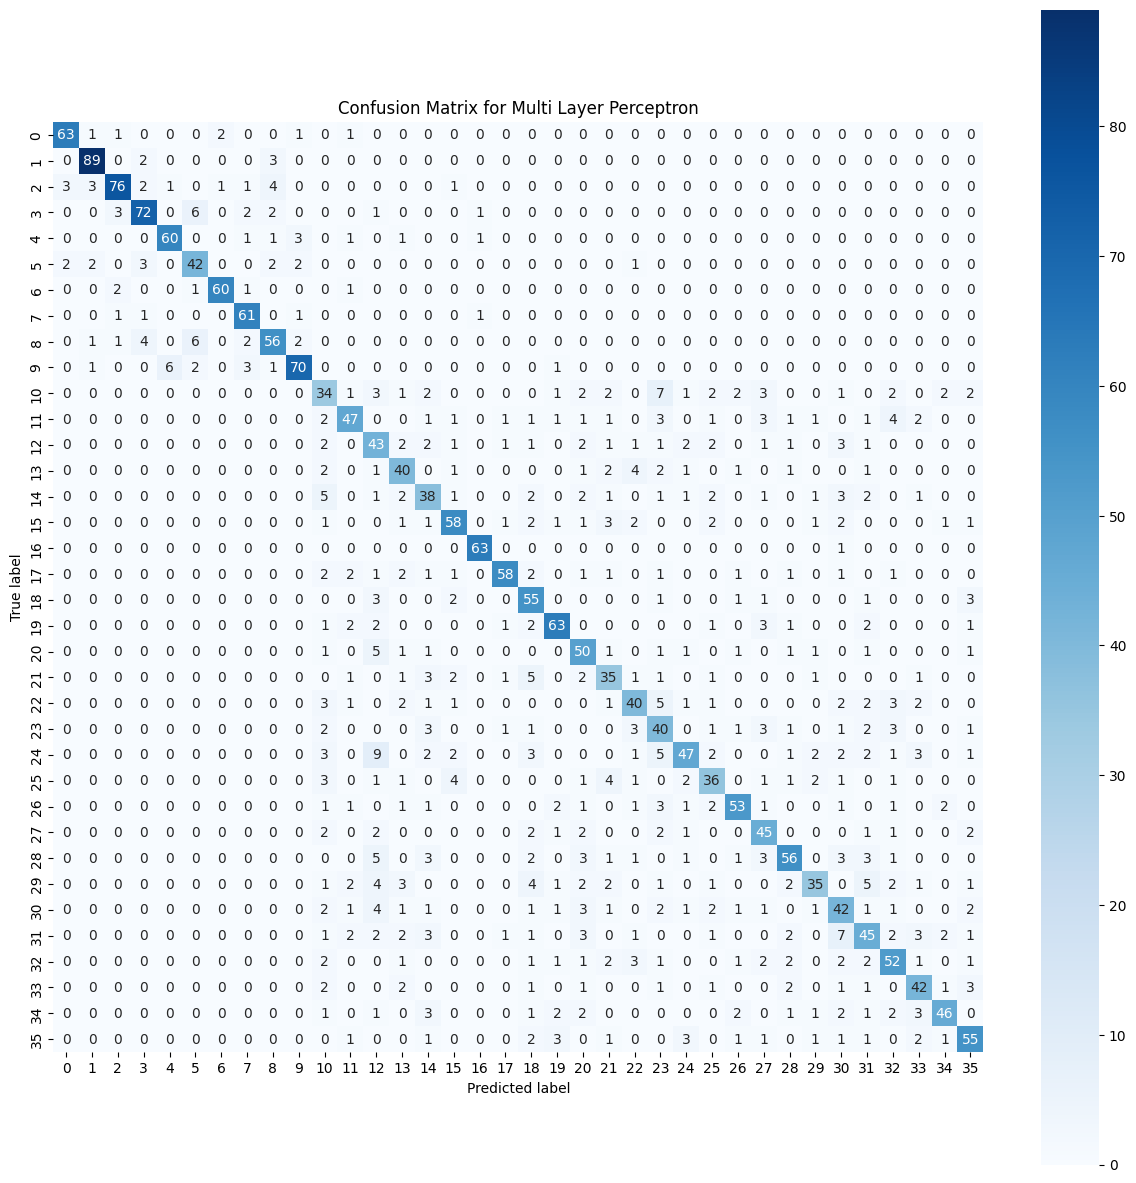

In [9]:
# confusion matrix
confusion_matrix_plot(test_y, y_pred, 'Confusion Matrix for Multi Layer Perceptron')

In [10]:
test_acc = accuracy_score(test_y, y_pred) * 100
print('Test Accuracy: ', test_acc)

Test Accuracy:  73.44610542879623


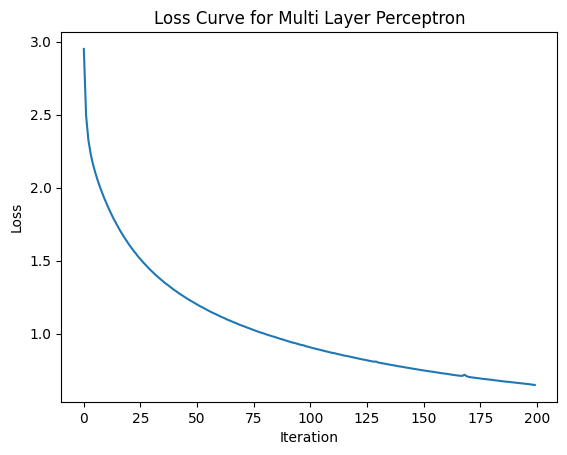

In [24]:
loss_values = mlp_model.loss_curve_
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve for Multi Layer Perceptron')
plt.show()

# Logistic Regression Modeli Testi

In [12]:
lr_model = pickle.load(open('model/logistic_regression.pkl', 'rb'))
y_pred = lr_model.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        69
           1       0.95      0.93      0.94        94
           2       0.87      0.80      0.84        92
           3       0.83      0.85      0.84        87
           4       0.88      0.88      0.88        68
           5       0.76      0.69      0.72        54
           6       0.91      0.92      0.92        65
           7       0.85      0.89      0.87        65
           8       0.77      0.78      0.77        72
           9       0.86      0.83      0.85        84
          97       0.24      0.19      0.21        68
          98       0.43      0.25      0.32        72
          99       0.21      0.22      0.22        67
         100       0.30      0.49      0.37        57
         101       0.14      0.16      0.14        64
         102       0.49      0.31      0.38        78
         103       0.92      0.91      0.91        64
         104       0.62    

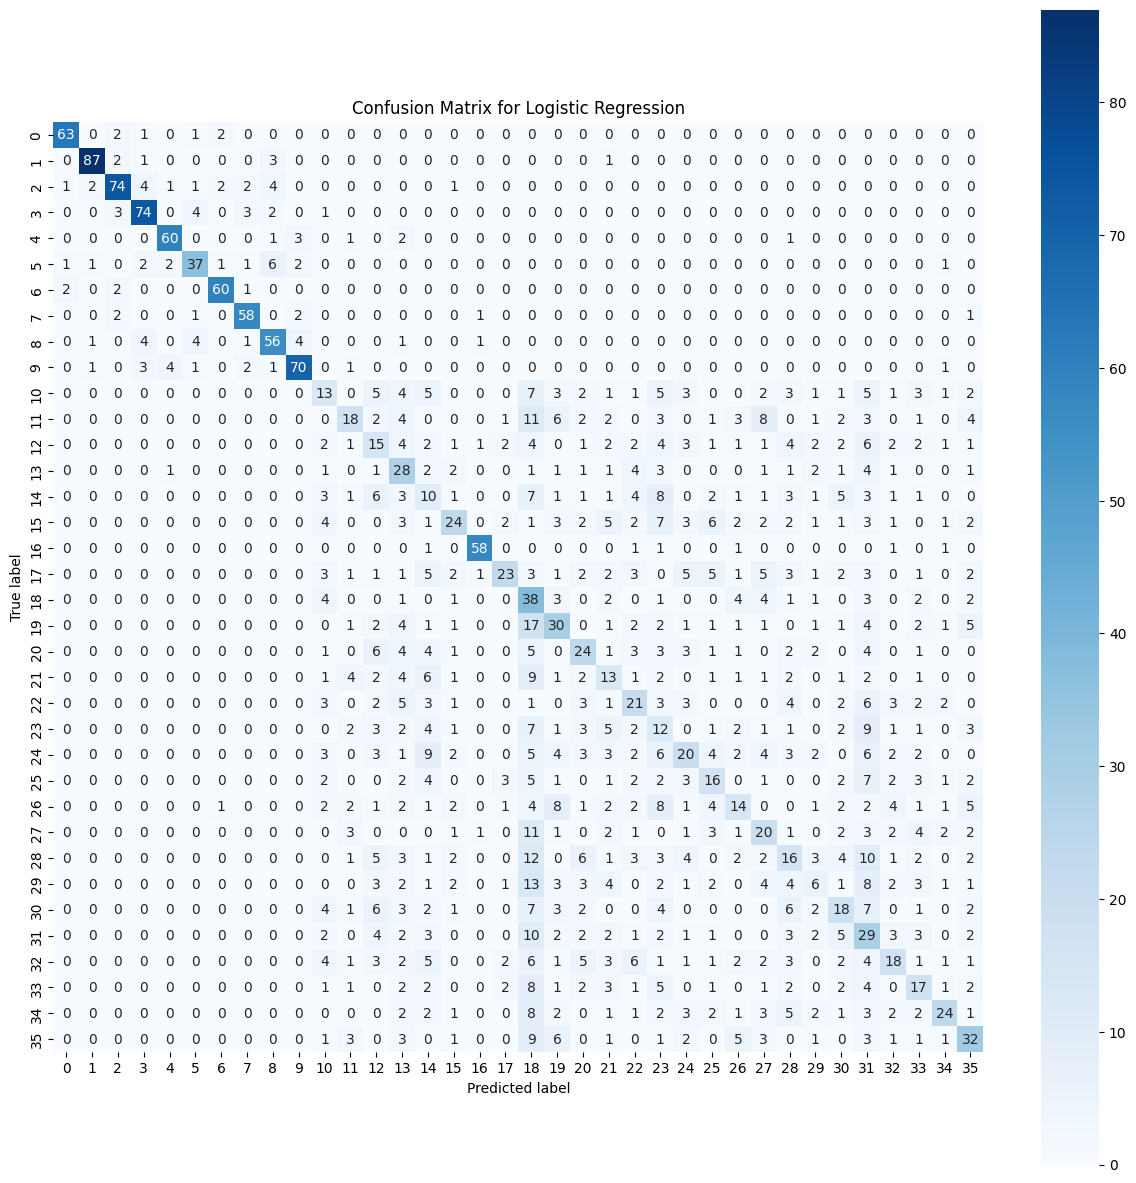

In [13]:
# confusion matrix
confusion_matrix_plot(test_y, y_pred, 'Confusion Matrix for Logistic Regression')

In [14]:
test_acc = accuracy_score(test_y, y_pred) * 100
print('Test Accuracy: ', test_acc)

Test Accuracy:  47.04956726986625


# K Nearest Neighbors Modeli Testi

In [15]:
knn_model = pickle.load(open('model/k_nearest_neighbors.pkl', 'rb'))
y_pred = knn_model.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        69
           1       0.83      0.96      0.89        94
           2       0.94      0.68      0.79        92
           3       0.85      0.82      0.83        87
           4       0.88      0.85      0.87        68
           5       0.79      0.57      0.67        54
           6       0.88      0.91      0.89        65
           7       0.82      0.78      0.80        65
           8       0.92      0.68      0.78        72
           9       0.86      0.79      0.82        84
          97       0.28      0.69      0.40        68
          98       0.33      0.62      0.43        72
          99       0.37      0.55      0.44        67
         100       0.47      0.63      0.54        57
         101       0.34      0.59      0.43        64
         102       0.67      0.73      0.70        78
         103       0.94      0.53      0.68        64
         104       0.61    

/Users/turhancan97/opt/anaconda3/envs/number-letter-recognition/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


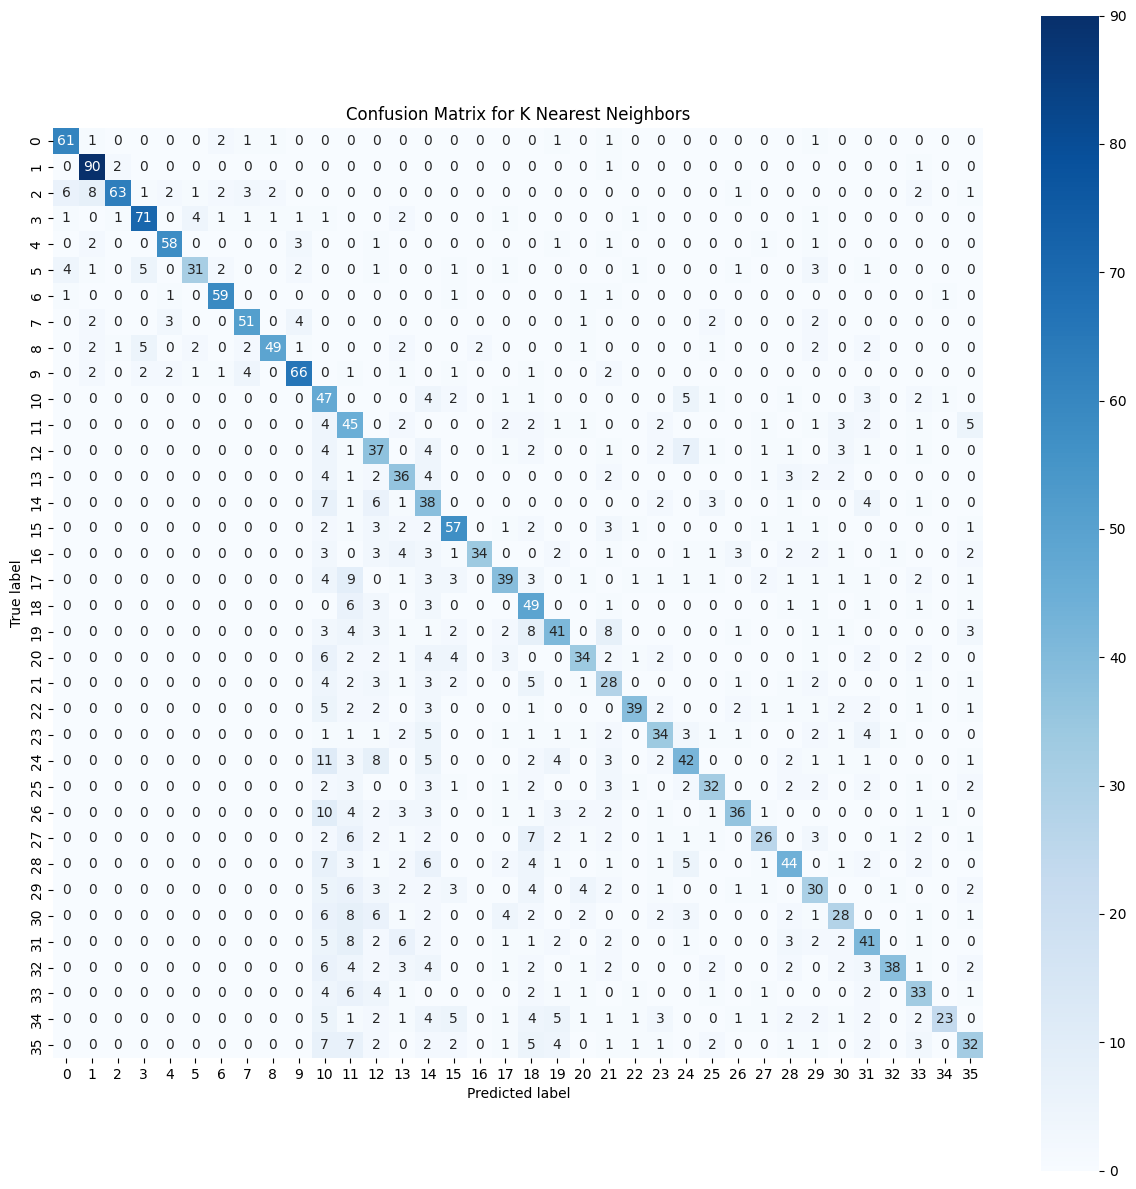

In [16]:
# confusion matrix
confusion_matrix_plot(test_y, y_pred, 'Confusion Matrix for K Nearest Neighbors')


In [17]:
test_acc = accuracy_score(test_y, y_pred) * 100
print('Test Accuracy: ', test_acc)

Test Accuracy:  61.447678992918966


# Support Vector Machine Modeli Testi

In [18]:
svm_model = pickle.load(open('model/support_vector_machine.pkl', 'rb'))
y_pred = svm_model.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        69
           1       0.98      0.97      0.97        94
           2       0.83      0.89      0.86        92
           3       0.92      0.89      0.90        87
           4       0.94      0.88      0.91        68
           5       0.92      0.85      0.88        54
           6       0.94      0.95      0.95        65
           7       0.94      0.91      0.92        65
           8       0.93      0.89      0.91        72
           9       0.95      0.89      0.92        84
          97       0.37      0.15      0.21        68
          98       0.53      0.26      0.35        72
          99       0.38      0.21      0.27        67
         100       0.23      0.47      0.31        57
         101       0.11      0.16      0.13        64
         102       0.72      0.29      0.42        78
         103       0.89      0.75      0.81        64
         104       0.74    

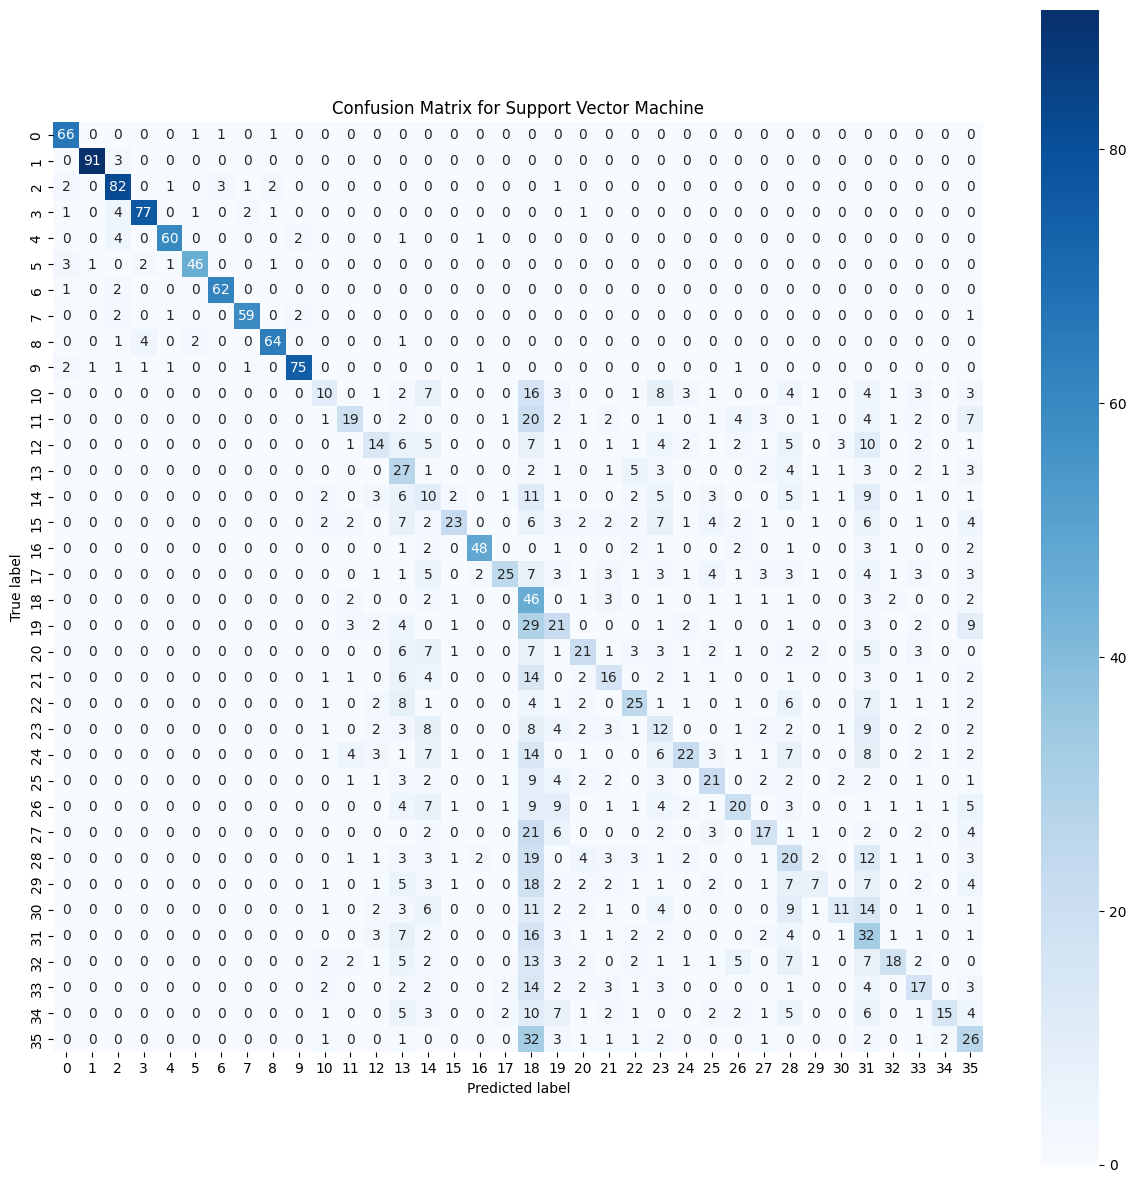

In [19]:
# confusion matrix
confusion_matrix_plot(test_y, y_pred, 'Confusion Matrix for Support Vector Machine')

In [20]:
test_acc = accuracy_score(test_y, y_pred) * 100
print('Test Accuracy: ', test_acc)

Test Accuracy:  48.1904012588513


# En iyi Model Sonucu

In [25]:
best_model = pickle.load(open('model/best_model.pkl', 'rb'))
y_pred = best_model.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        69
           1       0.99      0.97      0.98        94
           2       0.95      0.87      0.91        92
           3       0.87      0.87      0.87        87
           4       0.92      0.87      0.89        68
           5       0.81      0.87      0.84        54
           6       0.97      0.98      0.98        65
           7       0.91      0.89      0.90        65
           8       0.90      0.88      0.89        72
           9       0.89      0.88      0.89        84
          97       0.88      0.87      0.87        68
          98       0.95      0.83      0.89        72
          99       0.95      0.82      0.88        67
         100       0.85      0.82      0.84        57
         101       0.79      0.84      0.82        64
         102       0.94      0.95      0.94        78
         103       0.98      0.98      0.98        64
         104       0.90    

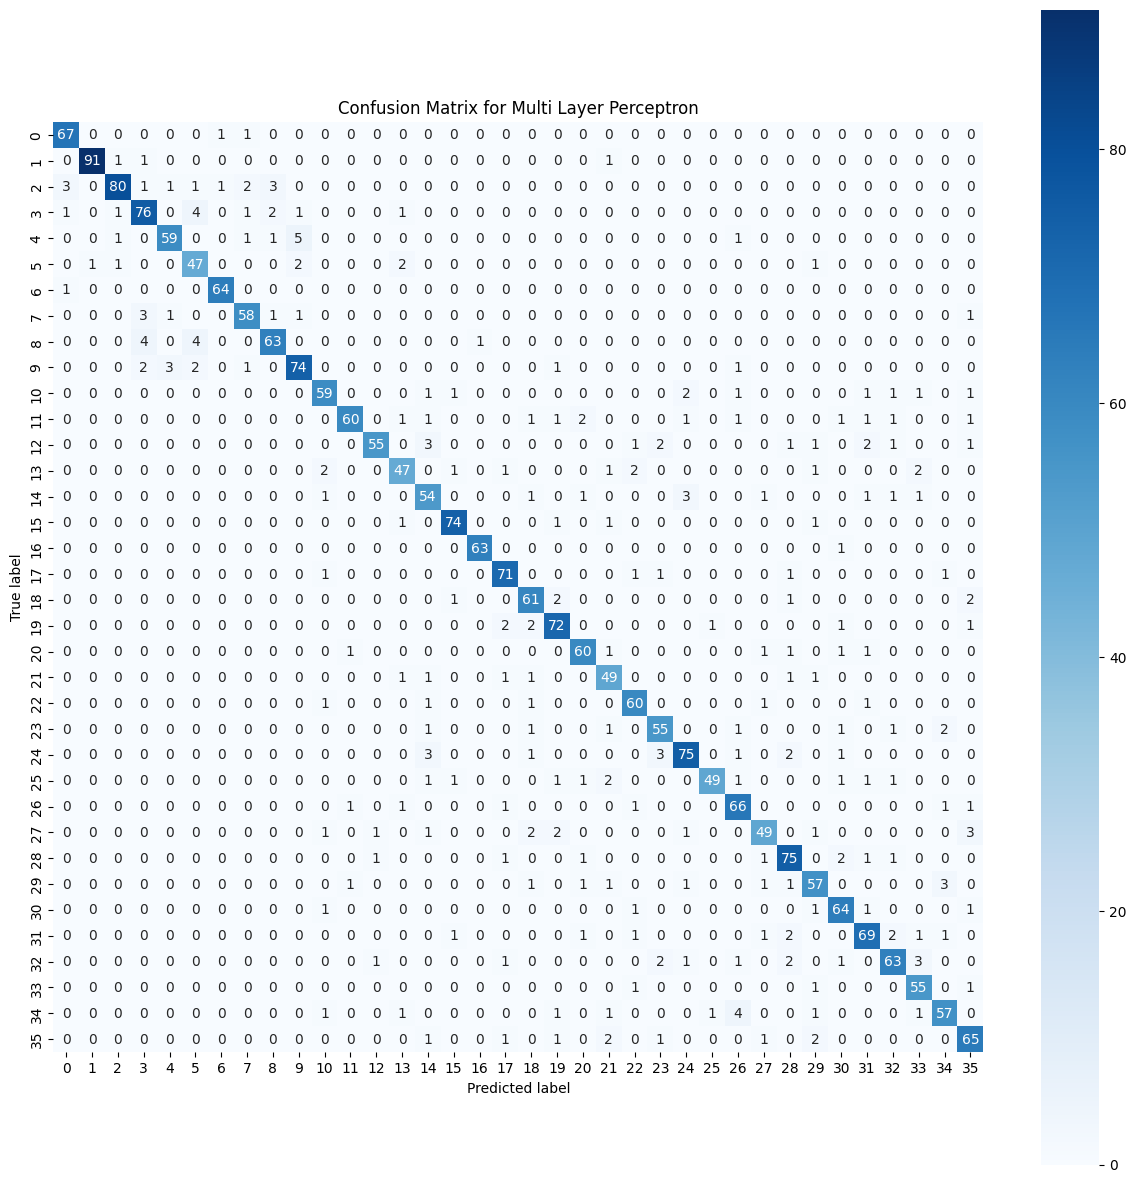

In [26]:
# confusion matrix
confusion_matrix_plot(test_y, y_pred, 'Confusion Matrix for Multi Layer Perceptron')

In [27]:
test_acc = accuracy_score(test_y, y_pred) * 100
print('Test Accuracy: ', test_acc)

Test Accuracy:  89.02439024390245


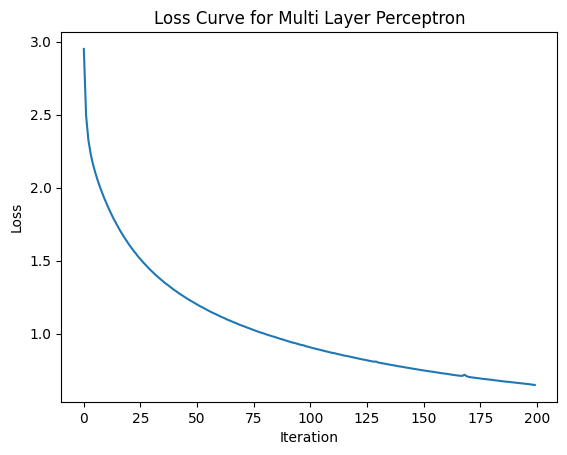

In [28]:
loss_values = mlp_model.loss_curve_
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve for Multi Layer Perceptron')
plt.show()